In [1]:
import keras
import os
import numpy as np
import pandas as pd
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.pyplot as plt

train_data_dir = "train"
validation_data_dir = "val"
img_width, img_height = 224, 224
model_name = 'densenet.h5'

model = keras.models.load_model(model_name)
model.summary()

/Users/kenneth/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

Found 9157 images belonging to 2 classes.


array([0.00163368, 0.02546705, 0.05785973, 0.00824698, 0.01023322,
       0.00961593, 0.00180279, 0.74038553], dtype=float32)

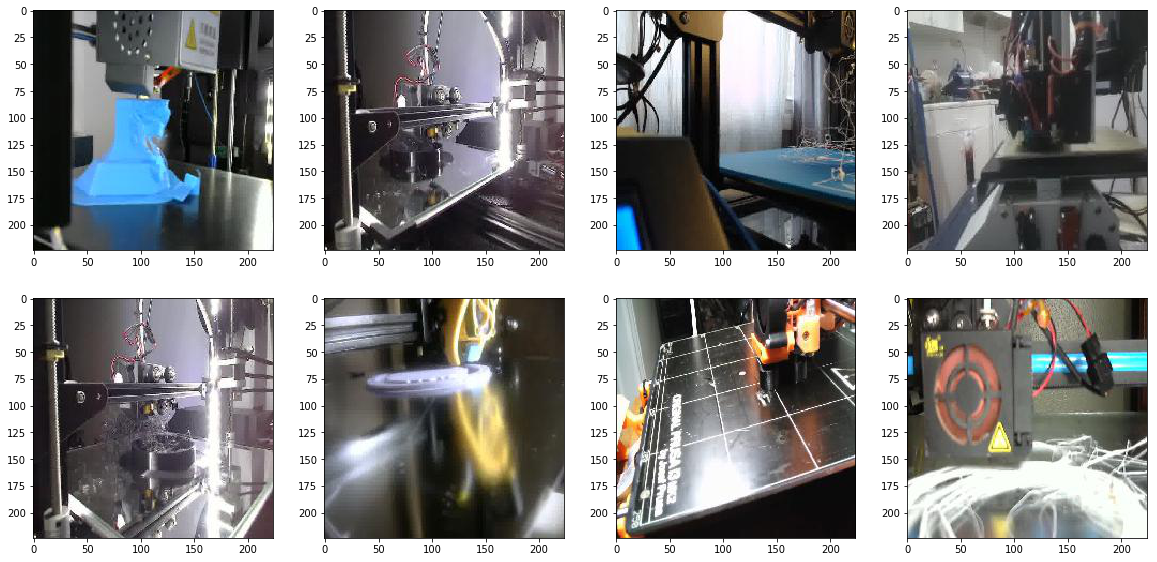

In [2]:
test_datagen = ImageDataGenerator(
rescale = 1./255)

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
batch_size = 8,
class_mode = "categorical")

imgs = validation_generator.next()[0]

plt.figure(figsize=(20,15))
columns = 4
for i in range(len(imgs)):
    plt.subplot(len(imgs) / columns + 1, columns, i + 1)
    plt.imshow(imgs[i])
    
model.predict(imgs)[:,1]

In [3]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    data = np.asarray( img, dtype="int32" )/255.0
    return data

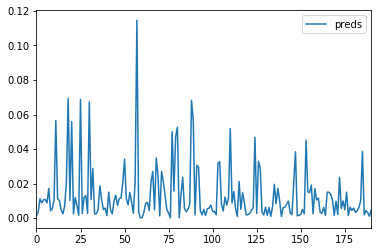

In [28]:
import matplotlib.image as mpimg
import glob

prefix = '529557335'
folder = 'train/best/'

plt.figure(figsize=(20,20))
columns = 16

jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds[:,1]))
df.plot()
# for i, img_path in enumerate(jpgs):
#     plt.subplot(len(jpgs) / columns + 1, columns, i + 1)
#     plt.imshow(mpimg.imread(img_path))

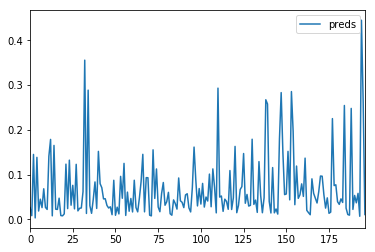

In [29]:
folder = 'train/worst/'
jpgs = glob.glob(folder + prefix + '-*.jpg')
imgs = np.asarray(list(map(load_image, jpgs)))

preds_bad = model.predict(imgs)
df = pd.DataFrame(dict(preds=preds_bad[:,1]))
df.plot()

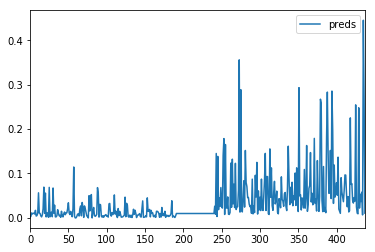

In [30]:
newpred = np.concatenate((preds, np.full((50,2), 0.01), preds_bad), axis=0)
df = pd.DataFrame(dict(preds=newpred[:,1]))
df.plot()

In [32]:
preds_bad

array([[0.97368443, 0.02631555],
       [0.99176437, 0.00823556],
       [0.85496473, 0.14503528],
       [0.9967843 , 0.00321568],
       [0.8615123 , 0.13848774],
       [0.98138064, 0.01861938],
       [0.9549187 , 0.0450814 ],
       [0.9738052 , 0.02619482],
       [0.9316808 , 0.06831924],
       [0.97323406, 0.02676591],
       [0.9778039 , 0.02219606],
       [0.85908556, 0.14091444],
       [0.82141453, 0.17858547],
       [0.9921698 , 0.0078302 ],
       [0.8348294 , 0.16517064],
       [0.97730994, 0.0226901 ],
       [0.9778324 , 0.02216759],
       [0.9526754 , 0.04732458],
       [0.99150836, 0.00849161],
       [0.9921727 , 0.00782732],
       [0.98777986, 0.01222006],
       [0.8766616 , 0.12333843],
       [0.9759926 , 0.02400732],
       [0.8677529 , 0.13224708],
       [0.9683631 , 0.03163685],
       [0.92399603, 0.07600401],
       [0.9765389 , 0.02346105],
       [0.8770634 , 0.12293662],
       [0.9810898 , 0.01891018],
       [0.97518456, 0.02481546],
       [0.